In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,f1_score

In [55]:
import matplotlib.pyplot as plt

In [56]:
sms_data=pd.read_csv(r"C:\Users\pshee\Desktop\sem 7\ML LAB\labset\Ml_programs_dataset\dataset\spam.csv",encoding="latin1")

In [57]:
sms_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [58]:
sms_data=sms_data[['v1','v2']]

In [59]:
sms_data=sms_data.rename(columns={'v1':'label','v2':'text'})

In [60]:
sms_data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [61]:
sms=sms_data

In [62]:
sms

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [63]:
x=sms.text
y=sms.label

In [64]:
n=sms.label.unique()
n

array(['ham', 'spam'], dtype=object)

In [65]:
class_distribution=sms_data.label.value_counts()


Text(0.5, 1.0, 'distribution of ham and spam messages')

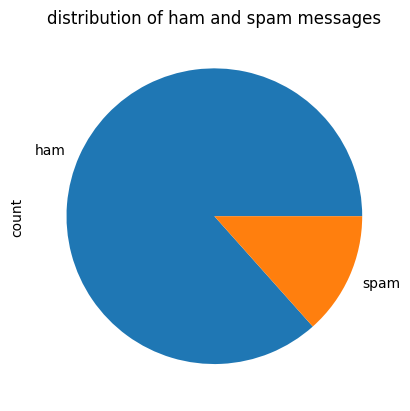

In [67]:
class_distribution.plot(kind="pie")
plt.title("distribution of ham and spam messages")

In [68]:
plt.show()

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [70]:
vectorizer=CountVectorizer()

In [71]:
x_train_vec=vectorizer.fit_transform(x_train)
x_test_vec=vectorizer.transform(x_test)

In [72]:
x_train_vec

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51569 stored elements and shape (3900, 7206)>

In [75]:
mnb=MultinomialNB(alpha=0.8,fit_prior=True,force_alpha=True)

In [76]:
mnb.fit(x_train_vec,y_train)

MultinomialNB(alpha=0.8)

In [77]:
mnb_y_pred=mnb.predict(x_test_vec)
print("accuracy_score\n",accuracy_score(y_test,mnb_y_pred))

accuracy_score
 0.9820574162679426


In [78]:
gnb=GaussianNB()
gnb.fit(x_train_vec.toarray(),y_train)

GaussianNB()

In [80]:
gnb_y_pred=gnb.predict(x_test_vec.toarray())
print("accuracy_score\n",accuracy_score(y_test,gnb_y_pred))

accuracy_score
 0.9043062200956937


In [89]:
print("F1 score of mnb:\n", f1_score(y_test, mnb_y_pred))


F1 score of mnb:
 0.9285714285714286


In [91]:
print("F1 score of gnb:\n", f1_score(y_test, gnb_y_pred, pos_label='spam'))

F1 score of gnb:
 0.7153024911032029
